##주가연계예금(ELD)
주가연계예금(Equity-Linked Deposit, ELD)은 기초 자산(주가, 주가지수 등)의 성과에 따라 수익이 결정되는 예금 상품입니다. 주로 원금 보장이 되며, 기초 자산의 성과에 따라 추가적인 수익을 얻을 수 있습니다.

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


초기 가격: 4411.59
만기 시점 가격: 5567.19
원금: 100000.00
수익: 20955.71
최종 금액: 120955.71


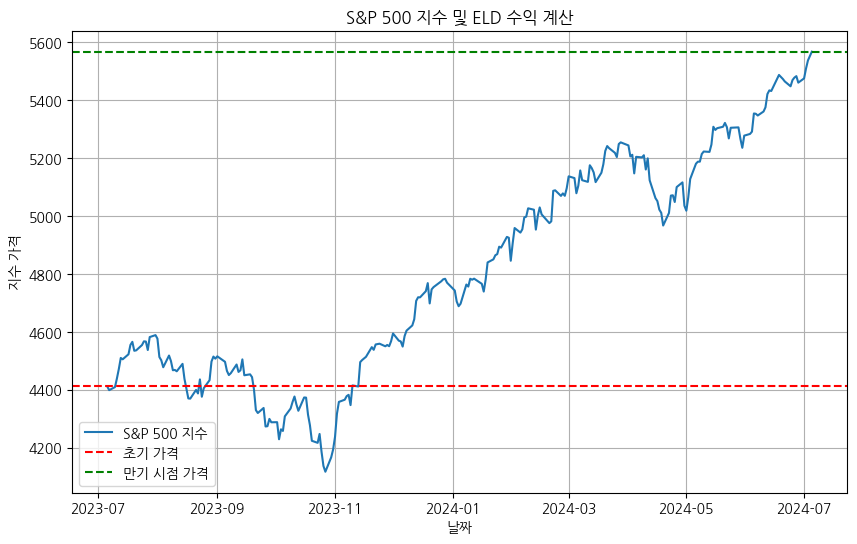

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# ELD의 수익률 계산 함수
def eld_return(initial_price, final_price, participation_rate, principal):
    """
    initial_price: 기초 자산의 초기 가격
    final_price: 기초 자산의 만기 시점 가격
    participation_rate: 참여율
    principal: 원금
    """
    price_return = (final_price - initial_price) / initial_price
    eld_profit = principal * participation_rate * price_return
    total_return = principal + eld_profit
    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(period="1y")
initial_price = sp500_data['Close'].values[0]  # 초기 가격
final_price = sp500_data['Close'].values[-1]  # 만기 시점 가격

# 기본 변수 설정
participation_rate = 0.8  # 참여율 (80%)
principal = 100000  # 원금 (100,000 달러)

# ELD의 수익률 계산
total_return = eld_return(initial_price, final_price, participation_rate, principal)
profit = total_return - principal

print(f"초기 가격: {initial_price:.2f}")
print(f"만기 시점 가격: {final_price:.2f}")
print(f"원금: {principal:.2f}")
print(f"수익: {profit:.2f}")
print(f"최종 금액: {total_return:.2f}")

# 시각화
dates = sp500_data.index
prices = sp500_data['Close'].values

plt.figure(figsize=(10, 6))
plt.plot(dates, prices, label='S&P 500 지수')
plt.axhline(y=initial_price, color='r', linestyle='--', label='초기 가격')
plt.axhline(y=final_price, color='g', linestyle='--', label='만기 시점 가격')
plt.xlabel('날짜')
plt.ylabel('지수 가격')
plt.title('S&P 500 지수 및 ELD 수익 계산')
plt.legend()
plt.grid(True)
plt.show()


초기 가격: 3700.65
최종 가격: 3839.50
최종 수익률: 0.03
최종 금액: 4120.07
수익: 120.07


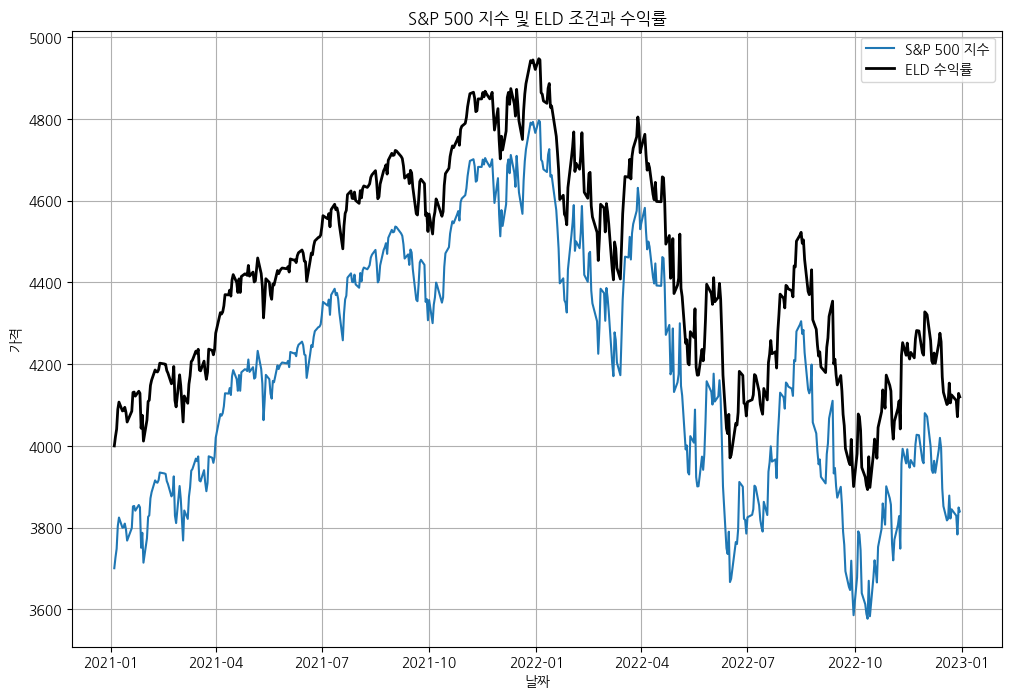

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# ELD의 수익률 계산 함수
def eld_return(initial_price, final_price, participation_rate, principal):
    """
    initial_price: 기초 자산의 초기 가격
    final_price: 기초 자산의 만기 시점 가격
    participation_rate: 참여율
    principal: 원금
    """
    price_return = (final_price - initial_price) / initial_price
    eld_profit = principal * participation_rate * price_return
    total_return = principal + eld_profit
    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start="2021-01-01", end="2023-01-01")
prices = sp500_data['Close'].values
initial_price = prices[0]  # 초기 가격
final_price = prices[-1]  # 만기 시점 가격

# 기본 변수 설정
participation_rate = 0.8  # 참여율 (80%)
principal = 4000  # 원금 (4,000 달러)

# ELD의 수익률 계산
total_return = eld_return(initial_price, final_price, participation_rate, principal)
eld_prices = principal + (prices - initial_price) * (participation_rate * principal / initial_price)
profit = total_return - principal

print(f"초기 가격: {initial_price:.2f}")
print(f"최종 가격: {final_price:.2f}")
print(f"최종 수익률: {total_return/principal - 1:.2f}")
print(f"최종 금액: {total_return:.2f}")
print(f"수익: {profit:.2f}")

# 시각화
dates = sp500_data.index

plt.figure(figsize=(12, 8))
plt.plot(dates, prices, label='S&P 500 지수')
plt.plot(dates, eld_prices, label='ELD 수익률', linewidth=2, color='black')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('S&P 500 지수 및 ELD 조건과 수익률')
plt.legend()
plt.grid(True)
plt.show()
